# Projeto 1

O seguinte projeto analisa e classifica possíveis inadimplêntes, Os passos desde o tratamento dos dados até a avaliação do modelo foram realizados como tarefas durante as aulas do módulo 7.

* Bibliotecas:

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

warnings.filterwarnings("ignore", category=UserWarning)

* Importação dos dados:

In [214]:
# Armazenando o dataset na variável 'data':

data = pd.read_csv('demo01.csv')

# Amostra de 5 linhas do dataset:

data.sample(n=5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
11468,M,N,N,0,Working,Secondary / secondary special,Married,House / apartment,52.852055,13.608219,1,1,1,0,2.0,False
16568,F,N,Y,0,Working,Secondary / secondary special,Widow,House / apartment,52.745205,5.635616,1,0,0,0,1.0,True
522,M,N,Y,1,Working,Incomplete higher,Married,House / apartment,37.780822,15.449315,1,1,1,0,3.0,False
5829,F,N,N,0,Working,Secondary / secondary special,Single / not married,With parents,52.183562,6.723288,1,0,0,0,1.0,False
13852,F,N,N,0,State servant,Secondary / secondary special,Married,House / apartment,50.772603,10.043836,1,1,1,0,2.0,False


* Exploração dos dados:

O dataset apresenta diversas informações sobre os clientes da aplicação, em especial, a coluna 'mal' que representa se o cliente foi um mal pagador nos ultimos 24 meses.
Esta variável será nossa variável alvo, ao final do projeto treinaremos um modelo de Machine Learning para classificar esta variável, afim de prever futuros possíveis inadimplêntes.

Informações básicas sobre o dataset:

In [215]:
data.info()
print(f'\nNúmero de linhas: {data.shape[0]}\nNúmero de colunas: {data.shape[1]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

Como visto através do método .info(), todas as variáveis tem o mesmo número de entradas que o total de entradas no dataframe, logo é esperado que o dataframe não contenha nenhum dado faltante.

In [216]:
# Utilizando uma função para conferir a presença de dados faltantes:

def stat_dados_faltantes(df: pd.DataFrame) ->  None:

    """Recebe um dataframe e retorna um dicionário com o nome da variável e a 
    porcentagem de dados faltantes variável. Caso não existam dados faltantes em nenhuma
    variável, retorna uma mensagem."""
    
    stat_dados_faltantes = []

    if df.isnull().any().sum()>0:
        for col in df.columns:
            if df[col].isnull().any():
                qnt = df[df[col].isna()].shape[0]
                total = df.shape[0]
                dic = {col: {'quantidade': qnt, 'porcentagem': round(qnt/total*100, 2)}}
                stat_dados_faltantes.append(dic)
    else:
        print('Dataframe não contém dados faltantes.')
    for stat in stat_dados_faltantes:
        print(stat)

In [217]:
stat_dados_faltantes(df=data)

Dataframe não contém dados faltantes.


Verificando as variáveis categóricas e numéricas:

In [218]:
data_categorica = data.select_dtypes('object')
data_numerica = data.select_dtypes(exclude='object')

list_cat = list(data_categorica.columns)
list_num = list(data_numerica.columns)

print(f'Número de colunas com variáveis categóricas: {data_categorica.shape[1]}.\n * Lista: {list_cat}')
print('\n')
print(f'Número de colunas com variáveis numericas: {data_numerica.shape[1]}.\n * Lista: {list_num}')

Número de colunas com variáveis categóricas: 7.
 * Lista: ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']


Número de colunas com variáveis numericas: 9.
 * Lista: ['qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular', 'possui_fone_comercial', 'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau']


In [219]:
# Estatísticas das variáveis categóricas:

data_categorica.describe().transpose()

,count,unique,top,freq
sexo,16650,2,F,11201
posse_de_veiculo,16650,2,N,10178
posse_de_imovel,16650,2,Y,11176
tipo_renda,16650,5,Working,8565
educacao,16650,5,Secondary / secondary special,11245
estado_civil,16650,5,Married,11680
tipo_residencia,16650,6,House / apartment,14974


In [220]:
# Estatísticas das variáveis numéricas:

data_numerica.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qtd_filhos,16650.0,0.433153,0.739395,0.000000,0.000000,0.000000,1.000000,14.000000
idade,16650.0,44.319513,11.228837,22.030137,34.873973,43.493151,53.410959,68.909589
tempo_emprego,16650.0,-161.416446,376.843912,-1000.665753,1.183562,4.691781,9.088356,42.906849
possui_celular,16650.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
possui_fone_comercial,16650.0,0.225225,0.417743,0.000000,0.000000,0.000000,0.000000,1.000000
possui_fone,16650.0,0.295676,0.456360,0.000000,0.000000,0.000000,1.000000,1.000000
possui_email,16650.0,0.088889,0.284592,0.000000,0.000000,0.000000,0.000000,1.000000
qt_pessoas_residencia,16650.0,2.211892,0.903755,1.000000,2.000000,2.000000,3.000000,15.000000


* Visualização e transformações das variáveis:

Podemos notar alguns valores estranhos nas estatísticas apresentadas, vamos explora-las mais a fundo:

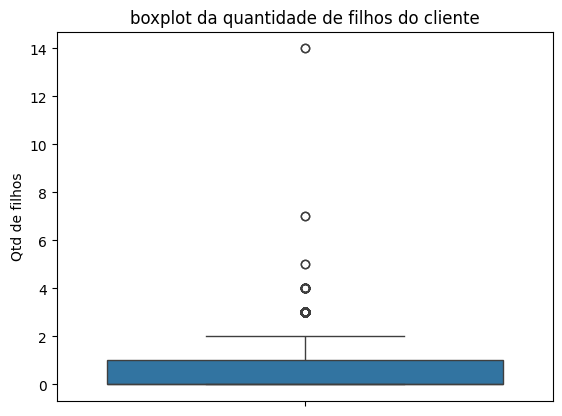

In [221]:
# Podemos notar que a quantidade máxima de filhos é igual a 14, um número bem elevado se considerarmos que o terceiro quartil desta variável é igual a 1.
# Possivelmente esta linha esta associada com um outlier, vamos analisar graficamente a variável 'qtd_filhos':

sns.boxplot(data=data, y='qtd_filhos')

plt.title('boxplot da quantidade de filhos do cliente')
plt.ylabel('Qtd de filhos')

plt.show()

In [222]:
# Removendo o outlier da variável 'qtd_filhos':

data = data[data['qtd_filhos'] < 10]

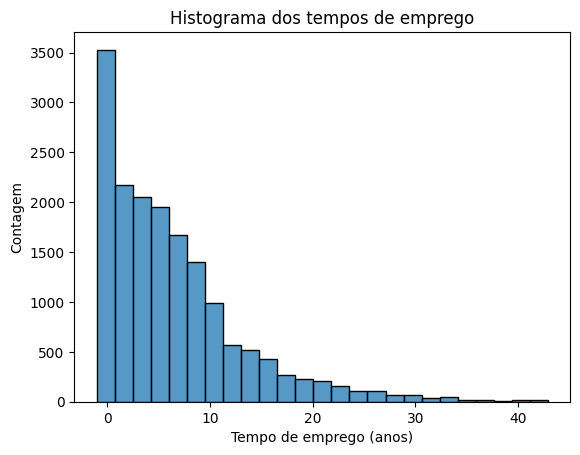

In [223]:
# A variável 'tempo_emprego' apresenta um valor mínimo inconsistente, que será substituido por -1:
# Convertendo tempo de emprego para 'int'

data['tempo_emprego'] = data['tempo_emprego'].apply(lambda x: -1 if x<0 else x)

sns.histplot(data=data, x='tempo_emprego', bins=25)

plt.title('Histograma dos tempos de emprego')
plt.ylabel('Contagem')
plt.xlabel('Tempo de emprego (anos)')

plt.show()

In [224]:
# A variável 'idade' esta em formato float e será convertida para int:

data['idade'] = data['idade'].astype(int)

In [225]:
# tratando as variáveis categóricas binárias:

data['sexo'] = data['sexo'].map({'M': 1, 'F':0})
data['posse_de_veiculo'] = data['posse_de_veiculo'].map({'Y':1, 'N':0})
data['posse_de_imovel'] = data['posse_de_imovel'].map({'Y':1, 'N':0})


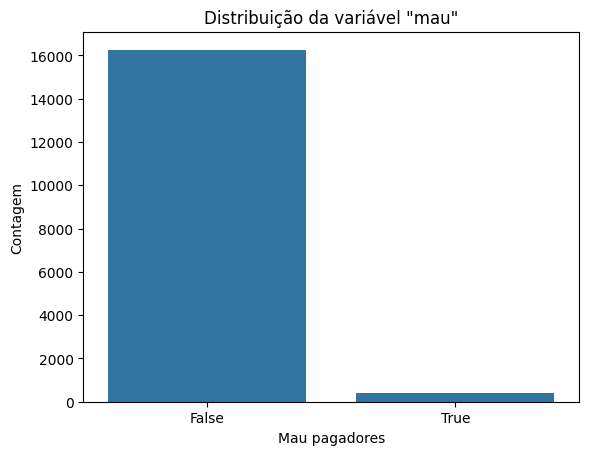

In [226]:
# Verificando a distribuição da variável alvo:

sns.countplot(data=data, x='mau')

plt.title('Distribuição da variável "mau"')
plt.ylabel('Contagem')
plt.xlabel('Mau pagadores')

plt.show()

Podemos notar que a variável alvo é desbalanceada, o que terá efeito na capacidade do modelo de realizar previões.

Metadados das variáveis:

In [227]:
# Criando listas com os tipos de dados e a quantidade de valores únicos
# para cada variável

dtype = []
qnt = []

for i in data.columns:
    dtype.append(data[i].dtype.name)
    qnt.append(data[i].nunique())

# Criando um dataframe e armazenando as informações:

df_meta = pd.DataFrame({
    'Variável': data.columns,
    'Dtype': dtype,
    'Qnt_valores': qnt
})

df_meta

,Variável,Dtype,Qnt_valores
0,sexo,int64,2
1,posse_de_veiculo,int64,2
2,posse_de_imovel,int64,2
3,qtd_filhos,int64,7
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,int32,47
9,tempo_emprego,float64,3005


Algumas variáveis categóricas apresentam uma maior cardinalidade, para elas, criaremos flags usando o método get.dummies().

In [228]:
data = pd.get_dummies(data, columns=['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], dtype=int)

Finalizamos esta sessão com o seguinte dataset, ja tratado e pronto para ser utilizado no treinamento do modelo: 

In [229]:
data.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58,3.106849,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,1,0,52,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,52,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
3,1,1,1,0,46,2.106849,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,29,3.021918,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


* Separando o conjunto de dados:

In [230]:
y = data['mau']
X = data.drop('mau', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

* Construção do modelo e Pruning para otimização:

In [231]:
modelo = DecisionTreeClassifier(random_state=42)

path = modelo.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [232]:
modelos = []

for ccp_alpha in ccp_alphas:
    modelo = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    modelo.fit(X_train, y_train)
    modelos.append(modelo)

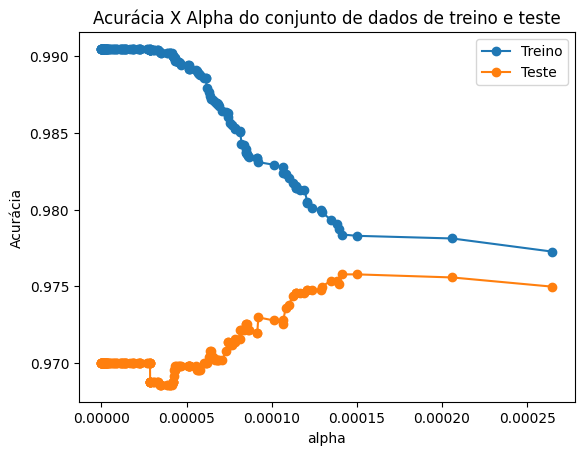

In [233]:
plt.close('all')

train_scores = [modelo.score(X_train, y_train) for modelo in modelos]
test_scores = [modelo.score(X_test, y_test) for modelo in modelos]

fig, ax = plt.subplots()

ax.set_xlabel('alpha')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia X Alpha do conjunto de dados de treino e teste')

ax.plot(ccp_alphas, train_scores, marker='o', label='Treino')
ax.plot(ccp_alphas, test_scores, marker='o', label='Teste')

ax.legend()

plt.show()


In [234]:
alphas = pd.DataFrame({'alpha': ccp_alphas.tolist(), 'score_teste': test_scores, 'score_treino': train_scores})
alphas

,alpha,score_teste,score_treino
0,0.000000,0.969970,0.990475
1,0.000000,0.969970,0.990475
2,0.000000,0.969970,0.990475
3,0.000000,0.969970,0.990475
4,0.000000,0.969970,0.990475
...,...,...,...
172,0.000139,0.975175,0.978718
173,0.000141,0.975776,0.978375
174,0.000150,0.975776,0.978289
175,0.000206,0.975576,0.978117


In [235]:
indice_max = alphas['score_teste'].idxmax()
alpha_max = alphas.loc[indice_max, 'alpha']

alpha_max

0.00014140989121819202

* Validação do modelo:

In [236]:
modelo_podado = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha_max)

modelo_podado.fit(X_train, y_train)
prev = modelo_podado.predict(X_test)

Acurácia: 0.9757757757757758


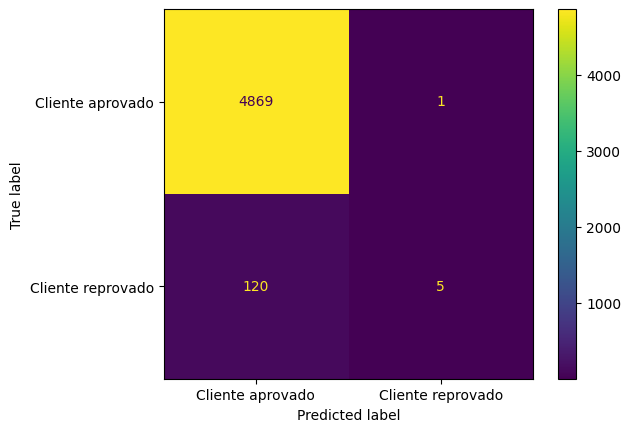

In [237]:
cm = confusion_matrix(y_test, prev, labels=modelo_podado.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cliente aprovado', 'Cliente reprovado'])
disp.plot()

print(f'Acurácia: {accuracy_score(y_test, prev)}')

É importante notar que: 
 - Existem poucos exemplos de maus pagadores

Uma variável alvo fortemente desbalanceada afeta consideravelmente a performance da Decision Tree de classificar corretamente a classe menos presente, como visto acima na matriz de confusão.

Por fim concluímos o projeto apresentando uma acurácia elevada para os dados de teste, porém com o adendo da baixa eficácia do modelo entre distinguir as classes a serem classificadas.